# &#x1F3D9; P7: Design an A/B Test

## &#x1F4D8; References

1. The final project: https://classroom.udacity.com/courses/ud257/lessons/4126079196/concepts/42072285530923
2. The project instructions: https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True
3. The template format: https://docs.google.com/document/d/16OX2KDSHI9mSCriyGIATpRGscIW2JmByMd0ITqKYvNg/edit
4. The final project results: https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0
5. The online calculator "Sample size": http://www.evanmiller.org/ab-testing/sample-size.html
6. The online calculator "Sign and binomial test": http://graphpad.com/quickcalcs/binomial1.cfm
7. Binomial distribution visualisation: http://databits.io/bits/fbmx-binomial-distribution
8. Simple interactive statistical analysis: http://www.quantitativeskills.com/sisa/calculations/bonhlp.htm

## &#x1F4D8; Experiment Design


### &#x1F4D6;  &nbsp;  Experiment Overview: Free Trial Screener

At the time of this experiment, Udacity courses currently have two options on the home page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. The screenshot below shows what the experiment looks like.

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

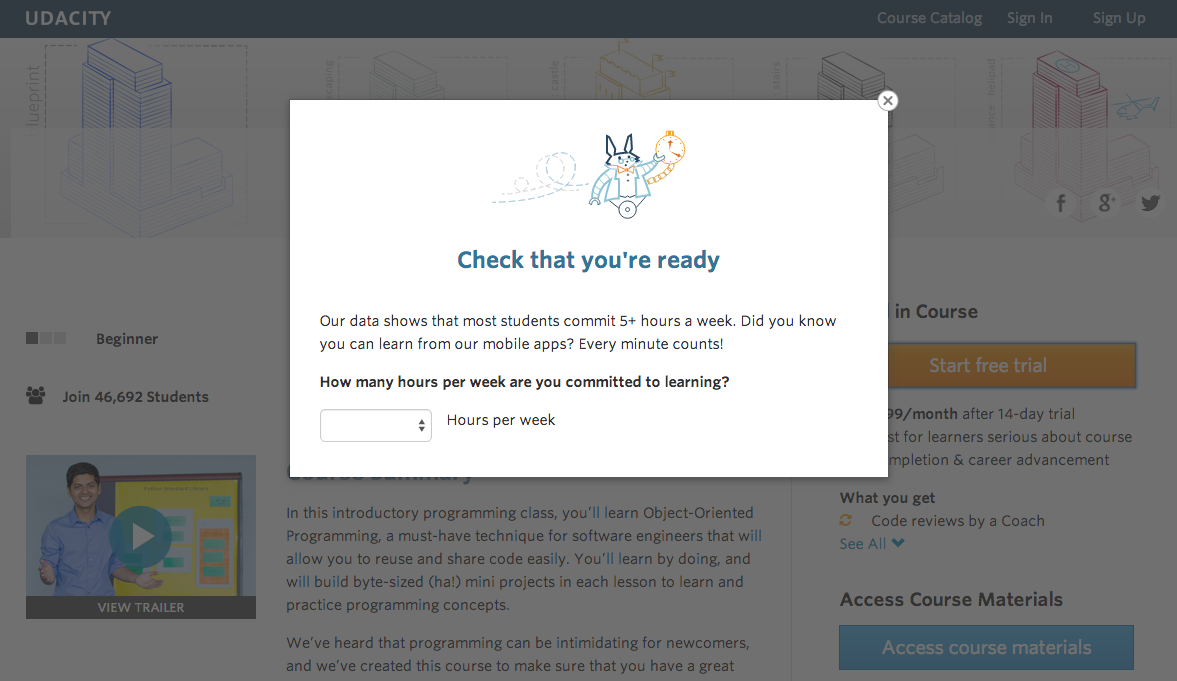

In [1]:
from IPython.display import Image
Image('Final_Project_Experiment_Screenshot.png')

### &#x1F4D6;  &nbsp; Metric Choice

&#x2753; Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.
- Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)
- Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)
- Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.


<span style="color:#338DD4">List which metrics you will use as invariant metrics and evaluation metrics here.</span>

<span style="color:#338DD4">(These should be the same metrics you chose in the "Choosing Invariant Metrics" and "Choosing Evaluation Metrics" quizzes.)</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; Invariant metrics (expected to be unchanged in the control and experimental groups):</span>
- <span style="color:#338DD4">number of cookies (cannot be affected by the experiment: users made a decision to visit the page before they were asked the question);</span>
- <span style="color:#338DD4">number of clicks (cannot be affected by the experiment: users clicked the button before they were asked the question); </span>
- <span style="color:#338DD4">click-through probability (cannot be affected by the experiment: it equals to the number of clicks divided by the number of cookies).</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; Evaluation metrics (expected to be different in the control and experimental groups):</span>
- <span style="color:#338DD4">gross conversion (can be affected by the experiment / can decrease: users could make a decision to enroll  in the free trial in the experimental group less than in the control group because they did not plan to learn 5+ hours  per week);</span>
- <span style="color:#338DD4">retention (can be affected by the experiment / can increase: enrolled users could be disappointed in the learning process less and make more payments in the experimental group than in the control group because they paid attention to studying 5+ hours  per week);</span>
- <span style="color:#338DD4">net conversion (can be affected by the experiment / can decrease: users could enroll in the free trial less in the experimental group than in the control group, thus could decrease the number of people who paid).</span>

&#x2757; The goals of the experiment in the practical meaning:
- the number of payments should not be decreased;
- the number of students who were disappointed and had not paid because they could not study enough time should be reduced.

The goals of the experiment in terms of our metrics: 
- the gross conversion should significantly decrease; 
- the retention should significantly increase;
- the net conversion should not decrease.

An important remark: the number of user-ids is neither a good invariant metric nor a good evaluation metric. 

From one side, the new pop-up message is likely to decrease the total number of user-ids who enrolled in the free trial, so it is not invariant; from the other side it is not normalized, the number of visitors may be different between the experiment and control groups, so it is not good for evaluation.

###  &#x1F4D6;  &nbsp; Measuring Variability

This list contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).
- Unique cookies to view page per day:	40000
- Unique cookies to click "Start free trial" per day:	3200
- Enrollments per day:	660
- Click-through-probability on "Start free trial":	0.08
- Probability of enrolling, given click:	0.20625
- Probability of payment, given enroll:	0.53
- Probability of payment, given click	0.1093125

&#x2753; For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time?

In [2]:
# Supporting calculation for the standard deviation
import math
print "5000 × 0.08 × 0.20625 = ", 5000 * 0.08 * 0.20625
print "SD Gross conversion = ", math.sqrt(0.20625 * (1 - 0.20625) / 400)
print "SD Retention = ", math.sqrt(0.53 * (1 - 0.53) / 82.5)
print "SD Net conversion = ", math.sqrt(0.1093125 * (1 - 0.1093125) / 400)

5000 × 0.08 × 0.20625 =  82.5
SD Gross conversion =  0.020230604137
SD Retention =  0.0549490121785
SD Net conversion =  0.0156015445825


&#x2757; I would like to expect the analytical variance is close to the empirical variance for the gross conversion and for the net conversion: the denominator for these two indicators is the number of clicks, which is also the unit of diversion.

And it would be useful to collect an empirical estimate of the variability for the retention: the unit of diversion was not used in this case, the empirical variance of the retention is more likely to be higher than the analytical variance.

<span style="color:#338DD4">List the standard deviation of each of your evaluation metrics.</span>

<span style="color:#338DD4">(These should be the answers from the "Calculating standard deviation" quiz.)</span>

- Number of cookies = 5000
- Number of clicks on "Start free trial" = 5000 × 0.08 = 400
- Number of enrollments = 5000 × 0.08 × 0.20625 = 82.5

#### <span style="color:#338DD4">&#x1F535; &nbsp; $SD \; Gross\; conversion = \sqrt{\frac{p * (1 - p)} {n}} = \sqrt{\frac{0.20625 * (1 - 0.20625)} {400} }= 0.0202$</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; $SD \; Retention = \sqrt{\frac{p * (1 - p)} {n}} = \sqrt{\frac{0.53 * (1 - 0.53)} { 82.5}} = 0.0549$</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; $SD \; Net\; conversion = \sqrt{\frac{p * (1 - p)} {n}} = \sqrt{\frac{0.1093125 * (1 - 0.1093125)} {400}} = 0.0156$</span>

### &#x1F4D6;  &nbsp; Sizing

##### Number of Samples vs. Power

&#x2753; Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.

&#x2757; I have used the online calculator (References, N5) for calculating the sample sizes and have chosen the largest.

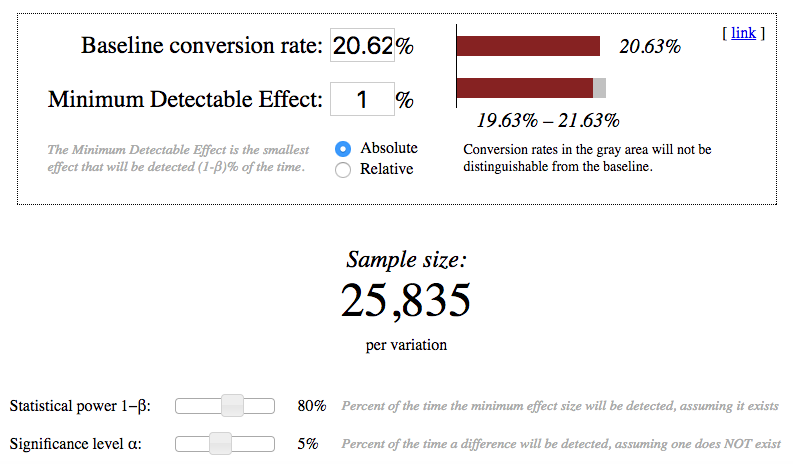

In [3]:
Image('Sample_Gross_conversion_Screenshot.png')

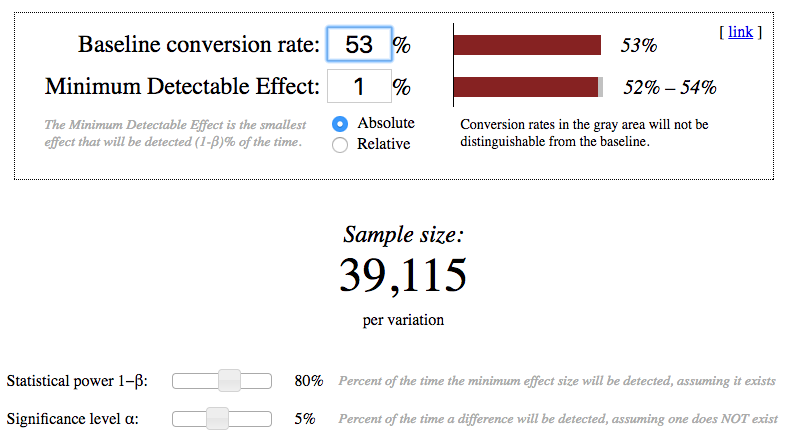

In [4]:
Image('Sample_Retention_Screenshot.png')

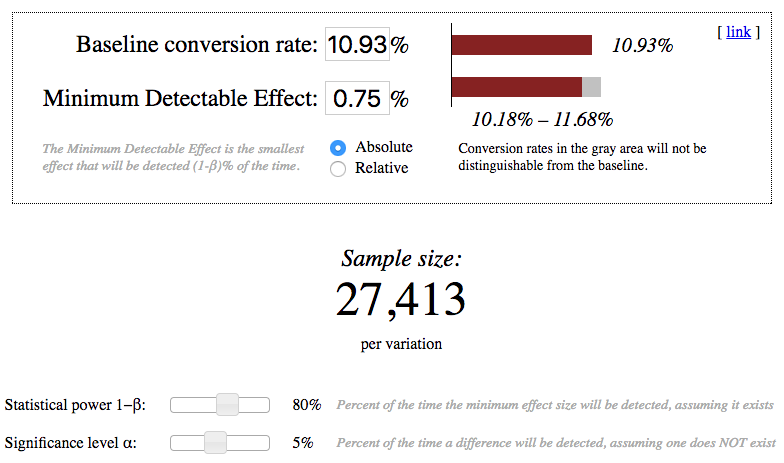

In [5]:
Image('Sample_Net_conversion_Screenshot.png')

In [6]:
# Supporting calculation for the control and experimental groups
print "Gross conversion: 2 × 25835 × 40000 ÷ 3200 = ", 2 * 25835 * 40000 / 3200.0
print "Retention:  2 × 39115 × 40000 ÷ 660 = ", 2 * 39115 * 40000 / 660.0
print "Net conversion:  2 × 27413 × 40000 ÷ 3200 = ", 2 * 27413 * 40000 / 3200.0

Gross conversion: 2 × 25835 × 40000 ÷ 3200 =  645875.0
Retention:  2 × 39115 × 40000 ÷ 660 =  4741212.12121
Net conversion:  2 × 27413 × 40000 ÷ 3200 =  685325.0


<span style="color:#338DD4">Indicate whether you will use the Bonferroni correction during your analysis phase, and give the number of pageviews you will need to power you experiment appropriately.</span>

<span style="color:#338DD4">(These should be the answers from the "Calculating Number of Pageviews" quiz.)</span>
#### <span style="color:#338DD4"> &#x1F534; &nbsp; I did not use the Bonferroni correction. &#x1F535; &nbsp; Number of pageviews: 4741212.</span>

##### Duration vs. Exposure

In [26]:
# Supporting calculation for the number of days
print "Number of pageviews: 4741212"
print "(for the experiment with the gross conversion, the retention, and the net conversion)"
print "Days (100% of the traffic) = 4741212 ÷ 40000 = ", 4741212 / 40000.0
print
print "Number of pageviews: 685325"
print "(for the experiment with the gross conversion and the net conversion)"
print "Days (100% of the traffic) = 685325 ÷ 40000 = ", 685325 / 40000.0 
print "Days (60% of the traffic) = 685325 ÷ 40000 ÷ 0.6 = ", 685325 / 40000.0 / 0.6

Number of pageviews: 4741212
(for the experiment with the gross conversion, the retention, and the net conversion)
Days (100% of the traffic) = 4741212 ÷ 40000 =  118.5303

Number of pageviews: 685325
(for the experiment with the gross conversion and the net conversion)
Days (100% of the traffic) = 685325 ÷ 40000 =  17.133125
Days (60% of the traffic) = 685325 ÷ 40000 ÷ 0.6 =  28.5552083333


&#x2753; What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic?
Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.

&#x2757; Even the use of 100 percent of the traffic does not allow testing in full for all three metrics (the gross conversion, the retention, and the net conversion). It turns out that we need to experiment 118 days. Of course, it is too long for tasks staged in the project. Percent reduction in traffic will increase this interval. Hence, it is necessary to reduce the number of test metrics and choose only two of them: the gross conversion and the net conversion.

I should reconsider an earlier decision about 4741212 needed pageviews and setup the number of pageviews equal to 685325. For the experiment with the gross conversion and the net conversion, we can use the period 17 days with the 100% traffic level. This interval is much better, but it gives us the result too quickly. The behavior of people in the field of education is quite difficult to analyze and trends in this area could be rarely detected in a short time period for 2-3 weeks. To slightly increase the time interval, we will set the percentage of used traffic at 60 (fraction = 0.6) and it gives us the number: 29 days.

It is also possible to take into consideration that the commercial risk is low: the site offers students to better plan and to evaluate their training time. The assumption of a sharp decrease in payments as a result of the pilot warning is devoid of practical foundation. For investments, the decisive factor is the first free period as a way to assess their own abilities, and it does not change during the experiment. The number of payments theoretically may slightly decrease due to the lower number of subscriptions, but this is only an assumption. Students who spend less than 5 hours a week are hardly able to complete the program successfully. In most cases, we are talking about reducing the waste of time for students and mentors.

And there is no risk in terms of privacy violation at all. Users do not enter any additional information about themselves in the process of the experiment except a little piece of information about planning.

It should be noted that the use of the fraction 0.6 does not affect the commercial interests seriously. From one side, the time interval and therefore the risk will increase. From another side, we keep the certain number of pageviews, therefore the experimental audience and the risk will not increase. It means our experiment could not practically be risky for the business.

Removing one indicator in the main part of the project, I want to analyze the experimental data in the last section on my own initiative a little bit wider and to determine what happens to the metrics "Retention" as the most interesting in terms of the psychological effect and the most unpredictable. 

<span style="color:#338DD4">(These should be the corrected answers from the "Calculating Number of Pageviews" quiz.)</span>
#### <span style="color:#338DD4"> &#x1F534; &nbsp; I did not use the Bonferroni correction. &#x1F535; &nbsp; Number of pageviews: 685325.</span>

<span style="color:#338DD4">Indicate what fraction of traffic you would divert to this experiment and, given this, how many days you would need to run the experiment.</span>

<span style="color:#338DD4">(These should be the answers from the "Choosing Duration and Exposure" quiz.)</span>
#### <span style="color:#338DD4"> &#x1F535; &nbsp; Number of pageviews: 685325. &#x1F535; &nbsp; Fraction of traffic exposed: 0.6. &#x1F535; &nbsp; Length of experiment: 29.</span>

## &#x1F4D8; Experiment Analysis

This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.

The meaning of each column is:
- Pageviews: Number of unique cookies to view the course overview page that day.
- Clicks: Number of unique cookies to click the course overview page that day.
- Enrollments: Number of user-ids to enroll in the free trial that day.
- Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment.

(Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Read the data for the control and experimental groups
control_data = pd.read_csv('Final_Project_Results_Control.csv')
experiment_data = pd.read_csv('Final_Project_Results_Experiment.csv')
control_data2 = control_data[:23]
experiment_data2 = experiment_data[:23]
print "Control data"
print control_data.head(3)
print
print "Experimental data"
print experiment_data.head(3)

Control data
   Day   Date  Pageviews  Clicks  Enrollments  Payments
0  Sat  11/10       7723     687        134.0      70.0
1  Sun  12/10       9102     779        147.0      70.0
2  Mon  13/10      10511     909        167.0      95.0

Experimental data
   Day   Date  Pageviews  Clicks  Enrollments  Payments
0  Sat  11/10       7716     686        105.0      34.0
1  Sun  12/10       9288     785        116.0      91.0
2  Mon  13/10      10480     884        145.0      79.0


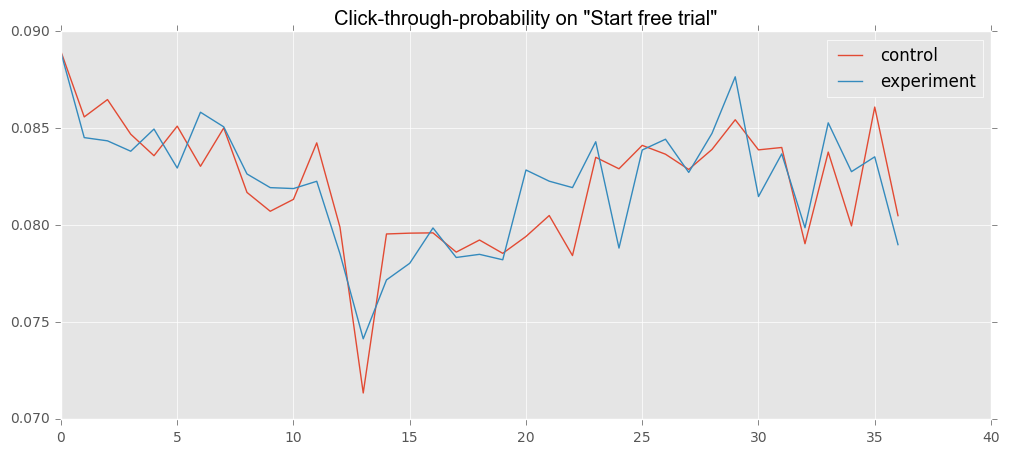

In [13]:
# Plot the metrics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)
csfont = {'fontname':'Arial'}
plt.title('Click-through-probability on "Start free trial"', **csfont)
line1, = plt.plot(control_data['Clicks']/control_data['Pageviews'], label='control')
line2, = plt.plot(experiment_data['Clicks']/experiment_data['Pageviews'], label='experiment')
plt.legend(handles=[line1, line2])

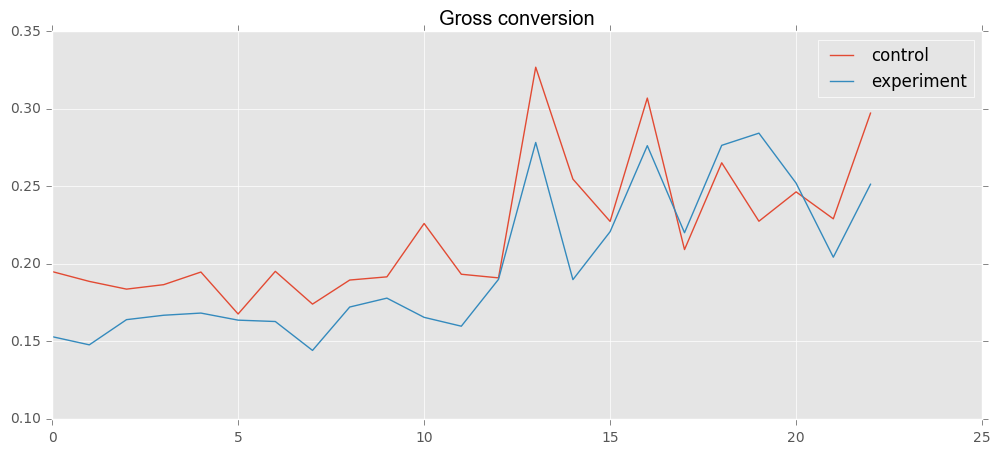

In [14]:
plt.title('Gross conversion', **csfont)
line3, = plt.plot(control_data2['Enrollments']/control_data2['Clicks'], label='control')
line4, = plt.plot(experiment_data2['Enrollments']/experiment_data2['Clicks'], label='experiment')
plt.legend(handles=[line3, line4])

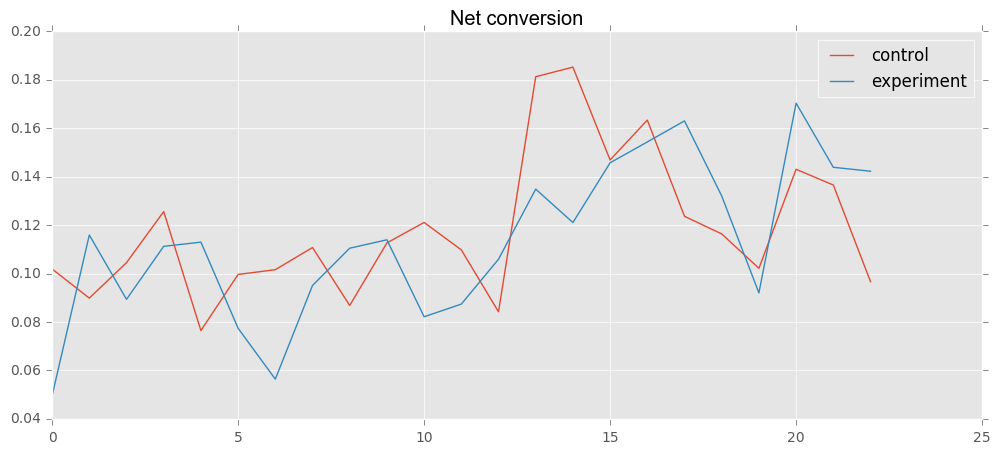

In [15]:
plt.title('Net conversion', **csfont)
line7, = plt.plot(control_data2['Payments']/control_data2['Clicks'], label='control')
line8, = plt.plot(experiment_data2['Payments']/experiment_data2['Clicks'], label='experiment')
plt.legend(handles=[line7, line8])

###  &#x1F4D6;  &nbsp;  Sanity Checks

&#x2753; Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level.
If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.

In [16]:
print "Control group:"
print "Clicks = ", control_data['Clicks'].sum(), "   ", \
      "Pageviews = ", control_data['Pageviews'].sum()
print 
print "Experimental group:"
print "Clicks = ", experiment_data['Clicks'].sum(), "   ", \
      "Pageviews = ", experiment_data['Pageviews'].sum()

Control group:
Clicks =  28378     Pageviews =  345543

Experimental group:
Clicks =  28325     Pageviews =  344660


In [17]:
# Supporting calculation for checking invariant metrics
p = 0.5
print "Number of cookies:"
SE_cookies = math.sqrt(p * p / (345543 + 344660))
print "Standard error SE = ", SE_cookies
ME_cookies = SE_cookies * 1.96
print "Margin of error ME = ", ME_cookies
(LB_cookies, UB_cookies) = (p - ME_cookies, p + ME_cookies)
print "Confidential interval CI = ", (LB_cookies, UB_cookies)
print u'p\u0302', "=", 345543.0 / (345543 + 344660), u'\u2208', (LB_cookies, UB_cookies), u'\u2713'
print
print 'Number of clicks on “Start free trial":'
SE_clicks = math.sqrt(0.5 * 0.5 / (28378 + 28325))
print "Standard error SE = ", SE_clicks
ME_clicks = SE_clicks * 1.96
print "Margin of error ME = ", ME_clicks
(LB_clicks, UB_clicks) = (p - ME_clicks, p + ME_clicks)
print "Confidential interval CI = ", (LB_clicks, UB_clicks)
print u'p\u0302', "=", 28378.0 / (28378 + 28325), u'\u2208', (LB_clicks, UB_clicks), u'\u2713'
print
print 'Click-through-probability on "Start free trial":'
p_pool = 1.0 * (28378 + 28325) / (345543 + 344660)
print "Pooled probability p_pool = ", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 345543 + 1.0 / 344660))
print "Standard error SE = ", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME = ", ME_pool
d_hat = 28325.0 / 344660 - 28378.0 / 345543
print "Difference", u'd\u0302', "= ", d_hat
(LB_pool, UB_pool) = (0 - ME_pool, 0 + ME_pool)
print "Confidential interval CI = ", (LB_pool, UB_pool)
print u'd\u0302', u'\u2208', (LB_pool, UB_pool), u'\u2713'

Number of cookies:
Standard error SE =  0.000601840740294
Margin of error ME =  0.00117960785098
Confidential interval CI =  (0.49882039214902313, 0.5011796078509769)
p̂ = 0.500639666881 ∈ (0.49882039214902313, 0.5011796078509769) ✓

Number of clicks on “Start free trial":
Standard error SE =  0.0020997470797
Margin of error ME =  0.00411550427621
Confidential interval CI =  (0.49588449572378945, 0.5041155042762105)
p̂ = 0.500467347407 ∈ (0.49588449572378945, 0.5041155042762105) ✓

Click-through-probability on "Start free trial":
Pooled probability p_pool =  0.0821540908979
Standard error SE =  0.000661060815639
Margin of error ME =  0.00129567919865
Difference d̂ =  5.66270915869e-05
Confidential interval CI =  (-0.0012956791986518956, 0.0012956791986518956)
d̂ ∈ (-0.0012956791986518956, 0.0012956791986518956) ✓


&#x2753; For any sanity check that did not pass, explain your best guess as to what went wrong based on the day-by-day data. Do not proceed to the rest of the analysis unless all sanity checks pass.

&#x2757; All invariant metrics have stood the test successfully. This is a very predictable result. Selecting these metrics was based on the lack of experiment influence.

<span style="color:#338DD4">For each of your invariant metrics, give the 95% confidence interval for the value you expect to observe, the actual observed value, and whether the metric passes your sanity check.</span> 

<span style="color:#338DD4">(These should be the answers from the "Sanity Checks" quiz.)</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; Number of cookies</span>
 <span style="color:#338DD4">Lower bound = 0.4988; Upper bound = 0.5012; Observed = 0.5006; Passes = &#x2705;</span>
#### <span style="color:#338DD4">&#x1F535; &nbsp; Number of clicks on “Start free trial"</span>
<span style="color:#338DD4">Lower bound = 0.4959; Upper bound = 0.5041; Observed = 0.5005; Passes = &#x2705;</span>
#### <span style="color:#338DD4">&#x1F535; &nbsp; Click-through-probability on "Start free trial" (Difference between the control and experimental groups)</span>
<span style="color:#338DD4">Lower bound = -0.0013; Upper bound = 0.0013; Observed = 0.0001; Passes = &#x2705;</span>

### &#x1F4D6;  &nbsp;  Result Analysis

##### Check for Practical and Statistical Significance

&#x2753; Next, for your evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)

In [18]:
print "Control group:"
print "Clicks = ", control_data2['Clicks'].sum(), "   ", \
"Enrollments = ", control_data2['Enrollments'].sum(), "   ", \
"Payments = ", control_data2['Payments'].sum()
print "Experimental group:"
print "Clicks = ", experiment_data2['Clicks'].sum(), "   ", \
"Enrollments = ", experiment_data2['Enrollments'].sum(), "   ", \
"Payments = ", experiment_data2['Payments'].sum()

Control group:
Clicks =  17293     Enrollments =  3785.0     Payments =  2033.0
Experimental group:
Clicks =  17260     Enrollments =  3423.0     Payments =  1945.0


In [19]:
# Supporting calculation for checking evaluation metrics
print "Gross conversion"
p_pool = 1.0 * (3785.0 + 3423.0) / (17293 + 17260)
print "Pooled probability p_pool = ", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 17293 + 1.0 / 17260))
print "Standard error SE = ", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME = ", ME_pool
d = 3423.0 / 17260 - 3785.0 / 17293
print "Difference d", "= ", d
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print "Confidential interval CI = ", (LB_pool, UB_pool)
print (-0.01, 0, 0.01), u'\u2209', (LB_pool, UB_pool)
print "Statistical significance", u'\u2713', "  Practical significance ", u'\u2713'
print
print "Net conversion"
p_pool = 1.0 * (2033.0 + 1945.0) / (17293 + 17260)
print "Pooled probability p_pool = ", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 17293 + 1.0 / 17260))
print "Standard error SE = ", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME = ", ME_pool
d = 1945.0 / 17260 - 2033.0 / 17293
print "Difference d = ", d
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print "Confidential interval CI = ", (LB_pool, UB_pool)
print 0, u'\u2208', (LB_pool, UB_pool),  ";  dmin = -0.0075", u'\u2208', (LB_pool, UB_pool)
print "Statistical significance", u'\u2718', "  Practical significance ", u'\u2718'

Gross conversion
Pooled probability p_pool =  0.208607067404
Standard error SE =  0.00437167538523
Margin of error ME =  0.00856848375504
Difference d =  -0.0205548745804
Confidential interval CI =  (-0.0291233583354044, -0.01198639082531873)
(-0.01, 0, 0.01) ∉ (-0.0291233583354044, -0.01198639082531873)
Statistical significance ✓   Practical significance  ✓

Net conversion
Pooled probability p_pool =  0.115127485312
Standard error SE =  0.00343413351293
Margin of error ME =  0.00673090168535
Difference d =  -0.00487372267454
Confidential interval CI =  (-0.011604624359891718, 0.001857179010803383)
0 ∈ (-0.011604624359891718, 0.001857179010803383) ;  dmin = -0.0075 ∈ (-0.011604624359891718, 0.001857179010803383)
Statistical significance ✘   Practical significance  ✘


&#x2753; If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?

&#x2757; We have measured two metrics in one experiment. Applying the Bonferroni correction means that the a-level for each hypothesis will be 2.5 % instead of 5% and confidential intervals will be significantly wider. It is too conservative for some reasons.

The use of the Bonferroni correction would really be needed if we test several metrics in one experiment and expect that at least one metrics will demonstrate the statistically significant change. In the set of metrics, this matching only for one indicator can be an absolutely random event, therefore the experiment will have a false positive result. It means we should increase the confidential intervals to avoid this situation and apply the Bonferroni correction.

But in the case of our experiment, we expect two metrics will have matched our criteria at the same time to proceed with the launch. It's a very strong condition without any correction. The positive results will be more likely to occur not by chance. Therefore, the Bonferroni correction could be the cause to approve the wrong null hypothesis and we should not use it this time.

Also, our metrics have a strong relationship between each other. If we know the outcome of one test of a difference between the control and experimental groups on one metrics, it would be easy to predict and to find the outcome of the other tests on the other metrics. It's absolutely natural to expect their behavior will be similar simultaneously.

##### Effect Size Tests

<span style="color:#338DD4">For each of your evaluation metrics, give a 95% confidence interval around the difference between the experiment and control groups. Indicate whether each metric is statistically and practically significant.</span>

<span style="color:#338DD4">(These should be the answers from the "Effect Size Tests" quiz.)</span>

#### <span style="color:#338DD4">&#x1F534; &nbsp; I did not use the Bonferroni correction.</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; Gross conversion (Difference between the control and experimental groups)</span>
<span style="color:#338DD4">Lower bound = -0.0291; Upper bound = -0.0120; Statistical significance = &#x2705;; Practical significance = &#x2705;</span>
#### <span style="color:#338DD4">&#x1F535; &nbsp; Net conversion (Difference between the control and experimental groups)</span>
<span style="color:#338DD4">Lower bound = -0.0116; Upper bound = 0.0019; Statistical significance = &#x274E;; Practical significance = &#x274E;</span>

##### Sign Tests

&#x2753; For each evaluation metric, do a sign test using the day-by-day breakdown.

In [25]:
# Supporting calculation of successful events for the evaluation metrics
Gross_conversion_success = experiment_data2['Enrollments']/experiment_data2['Clicks'] \
>control_data2['Enrollments']/control_data2['Clicks']
print "Gross conversion: success =", Gross_conversion_success.sum(), "  total =", Gross_conversion_success.size
Net_conversion_success = experiment_data2['Payments']/experiment_data2['Clicks'] \
>control_data2['Payments']/control_data2['Clicks']
print "Net conversion: success =", Net_conversion_success.sum(), "  total =", Net_conversion_success.size

Gross conversion: success = 4   total = 23
Net conversion: success = 10   total = 23


&#x2757; I have used the online calculator (References, N6) for the sign tests.

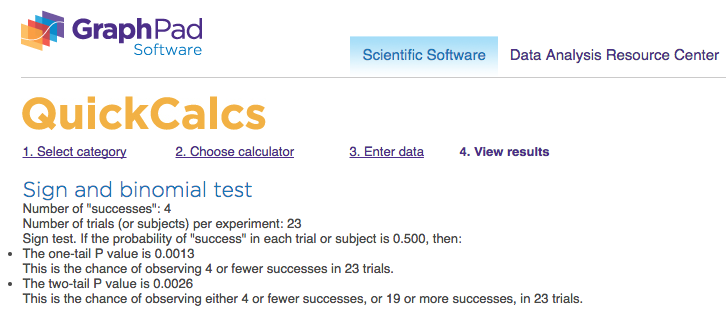

In [110]:
Image('Sign_Gross_conversion_Screenshot.png')

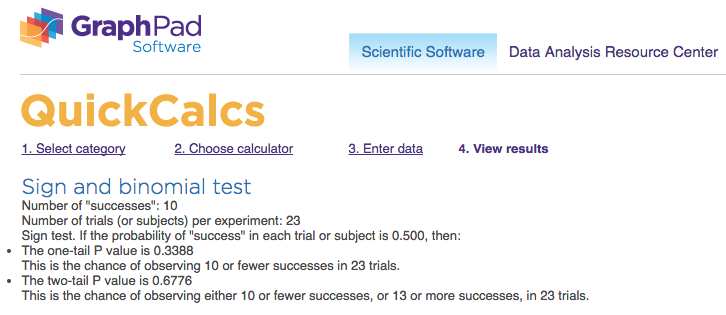

In [112]:
Image('Sign_Net_conversion_Screenshot.png')

<span style="color:#338DD4">For each of your evaluation metrics report the p-value of the sign test and whether the result is statistically significant.</span> 

<span style="color:#338DD4">(These should be the answers from the "Sign Tests" quiz.)</span>

#### <span style="color:#338DD4">&#x1F534; &nbsp; I did not use the Bonferroni correction.</span>

#### <span style="color:#338DD4">&#x1F535; &nbsp; Gross conversion: p-value = 0.0026; statistical significance = &#x2705;</span>
#### <span style="color:#338DD4">&#x1F535; &nbsp; Net conversion: p-value = 0.6776; statistical significance = &#x274E;</span>

##### Summary

&#x2753; State whether you used the Bonferroni correction, and explain why or why not. If there are any discrepancies between the effect size hypothesis tests and the sign tests, describe the discrepancy and why you think it arose.

&#x2757; Eventually, the effective size and sign tests show that the site change would statistically significantly reduce the gross conversion, but would not affect the net conversion in a statistically significant way. The effect size test states this in the practical meaning also.

I did not use the Bonferroni correction for any calculations because it will be too conservative in the case of highly related metrics which should give the expected result simultaneously.

###  &#x1F4D6;  &nbsp; Recommendation

&#x2753; Finally, make a recommendation. Would you launch this experiment, not launch it, dig deeper, run a follow-up experiment, or is it a judgment call? If you would dig deeper, explain what area you would investigate. If you would run follow-up experiments, briefIy describe that experiment. If it is a judgment call, explain what factors would be relevant to the decision.

&#x2757; The recommendation is not to launch the experiment change because the negative results have outweighed the positive ones.

&#x1F534; &nbsp; Positive results of the experiment.
- The difference for the gross conversion is practically significant and negative. This is a good sign: the Udacity team can lower costs by a number of trial signups.
- The difference for the net conversion is not statistically significant. It means the absence of serious financial losses.

&#x1F535; &nbsp; Negative results of the experiment:
- The interval for the difference in the case of the net conversion includes negative numbers. Therefore, the team has a risk to decrease incomes.
- We have not gathered enough data to draw conclusions about the retention and because of this we can not evaluate correctly the difference between the control and experimental groups for a number of students who were disappointed in studying during the free period. Consequently, we do not know enrolled users would be disappointed in the learning process less and make more payments or would not.

## &#x1F4D8; Follow-Up Experiment

Before scheduling the follow-up experiment, I would like to analyze the available data for the evaluation metrics "Retention".

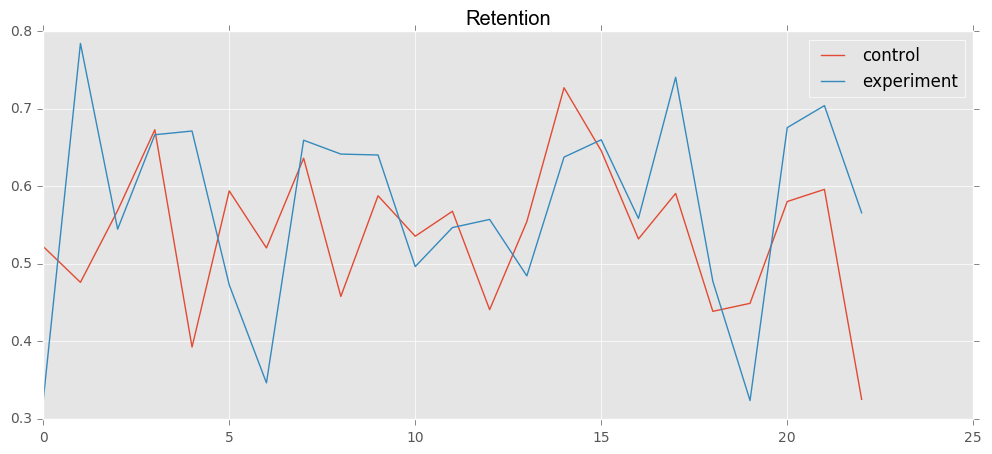

In [27]:
plt.title('Retention', **csfont)
line5, = plt.plot(control_data2['Payments']/control_data2['Enrollments'], label='control')
line6, = plt.plot(experiment_data2['Payments']/experiment_data2['Enrollments'], label='experiment')
plt.legend(handles=[line5, line6])

In [24]:
print "Retention"
print
print "Effect Size Tests"
p_pool = 1.0 * (2033.0 + 1945.0) / (3785.0 + 3423.0)
print "Pooled probability p_pool = ", p_pool
SE_pool = math.sqrt(p_pool * (1 - p_pool) * (1.0 / 3785.0 + 1.0 / 3423.0))
print "Standard error SE = ", SE_pool
ME_pool = SE_pool * 1.96
print "Margin of error ME = ", ME_pool
d = 1945.0 / 3423.0 - 2033.0 / 3785.0
print "Difference d = ", d
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print "Confidential interval CI = ", (LB_pool, UB_pool)
print  0, u'\u2209', (LB_pool, UB_pool), ";  dmin = 0.01", u'\u2208', (LB_pool, UB_pool)
print "Statistical significance", u'\u2713', "  Practical significance ", u'\u2718'
print 
print "Sign test"
Retention_success = experiment_data2['Payments']/experiment_data2['Enrollments'] \
>control_data2['Payments']/control_data2['Enrollments']
print "success =", Retention_success.sum(), "  total =", Retention_success.size

Retention

Effect Size Tests
Pooled probability p_pool =  0.551886792453
Standard error SE =  0.0117297800914
Margin of error ME =  0.0229903689791
Difference d =  0.0310948047071
Confidential interval CI =  (0.008104435728019967, 0.05408517368626556)
0 ∉ (0.008104435728019967, 0.05408517368626556) ;  dmin = 0.01 ∈ (0.008104435728019967, 0.05408517368626556)
Statistical significance ✓   Practical significance  ✘

Sign test
success = 13   total = 23


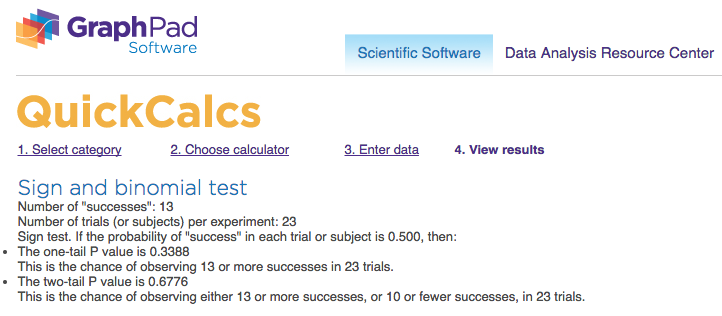

In [111]:
Image('Sign_Retention_Screenshot.png')

#### <span style="color:#338DD4">Retention (Difference between the control and experimental groups)</span>
#### <span style="color:#338DD4">&#x1F535; &nbsp; Effect size test</span>
<span style="color:#338DD4">Lower bound = 0.0081; Upper bound = 0.0541; Statistical significance = &#x2705;; Practical significance = &#x274E;</span>
#### <span style="color:#338DD4">&#x1F535; &nbsp; Sign test: p-value = 0.6776; statistical significance = &#x274E;</span>

&#x2753; If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.

In [35]:
Gross_conversion_diff = experiment_data2['Enrollments']/experiment_data2['Clicks'] - \
control_data2['Enrollments']/control_data2['Clicks']
print "Gross conversion difference"
print "Median: ", Gross_conversion_diff.median()
print "Mean: ", Gross_conversion_diff.mean()
print
Retention_diff = experiment_data2['Payments']/experiment_data2['Enrollments'] - \
control_data2['Payments']/control_data2['Enrollments']
print "Retention difference"
print "Median: ", Retention_diff.median()
print "Mean: ", Retention_diff.mean()
print
Net_conversion_diff = experiment_data2['Payments']/experiment_data2['Clicks'] - \
control_data2['Payments']/control_data2['Clicks']
print "Net conversion difference"
print "Median: ", Net_conversion_diff.median()
print "Mean: ", Net_conversion_diff.mean()

Gross conversion difference
Median:  -0.0247583431053
Mean:  -0.0207845820293

Retention difference
Median:  0.0232108317215
Mean:  0.0333425074664

Net conversion difference
Median:  -0.00902785253995
Mean:  -0.00489685698981


&#x2757; Statistical significance of the difference between the control and experimental groups was checked by using the values of the mean (effect size tests) and the median (sign tests). As we can see, these values vary considerably for the retention and it causes that the test results also differ.

 Even a cursory analysis of insufficient data in a certain way confirms our intuitive assumptions about the behavior of this metric. The ratio of payments to enrollments tends to increase in the presence of the experimental warning. However, it is not possible to confirm this with sufficient certainty in the borders of this experiment and it is necessary to redesign the research.

&#x2753; If you wanted to reduce the number of frustrated students who cancel early in the course, what experiment would you try? Give a brief description of the change you would make, what your hypothesis would be about the effect of the change, what metrics you would want to measure, and what unit of diversion you would use. Include an explanation of each of your choices.

&#x2757;I would suggest these possible changes to the proposed experiment.
- Extend the duration of the experiment up to 2 months with constant monitoring of incomes for avoiding financial risks. If the decline in revenues becomes out of the certain limits, the study should be stopped immediately.
- Measure all three evaluation metrics (the gross conversion, the retention, and the net conversion) for the 100% level of traffic because the audience of this site is very different in education, age, nationality, and other characteristics. Any reduction in the percentage of participants can significantly distort the results.
- Replace the visualization message by the video with an explanation of successful learning strategies based on statistics of the particular site or by the input test for the course level recommendations exactly for this user.
- In order to avoid the negative psychological effect or cut the extremely talented part of the audience which is able to pass the course without spending a lot of time to study, all changes should be only informative and recommendatory.
- Recommendations in the videos or leveled tests should have the most practical character that is suitable for this course.
- The length of free trial period is unchanged.

I think the effect will be more detectable.

Now we can begin to define the technical details of the experiment. Selecting the unit of diversion, and invariant and evaluation metrics was quite reasonable. It is easy to obtain measurement results for decision making without the high level of costs or risks. Accordingly, I propose to leave them unchanged.
- Unit of diversion: the cookie.
- Invariant metrics: the number of cookies, the number of clicks, and the click-through-probability.
- Evaluation metrics: the gross conversion, the retention, and the net conversion.

The hypothesizes about the behavior of our metrics are also stayed the same:
- the gross conversion should significantly decrease;
- the retention should significantly increase;
- the net conversion should not decrease.

I expect the overcoming the negative results of the previous experiment and detecting the tendencies for all evaluation metrics.